# 数据预处理、降维、特征提取及聚类
## 数据预处理
### 使用StandardScaler进行数据预处理

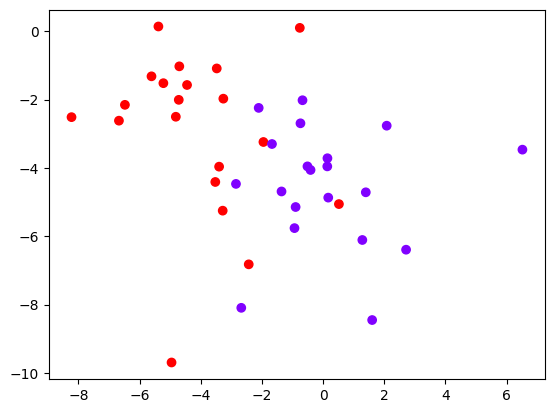

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=50, cluster_std=2)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.rainbow)
plt.show()

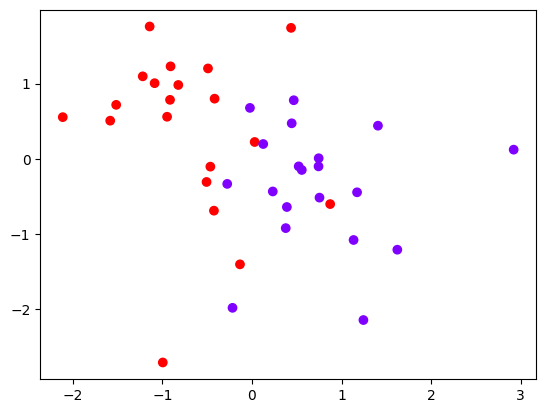

In [11]:
from sklearn.preprocessing import StandardScaler
X_1 = StandardScaler().fit_transform(X)
plt.scatter(X_1[:,0], X_1[:,1], c=y, cmap=plt.cm.rainbow)
plt.show()

**结果分析**: StandardScaler将所有数据的特征值转换为均值为0，方差为1的状态，确保数据的“大小”一致

### 使用MinMaxScale进行数据预处理

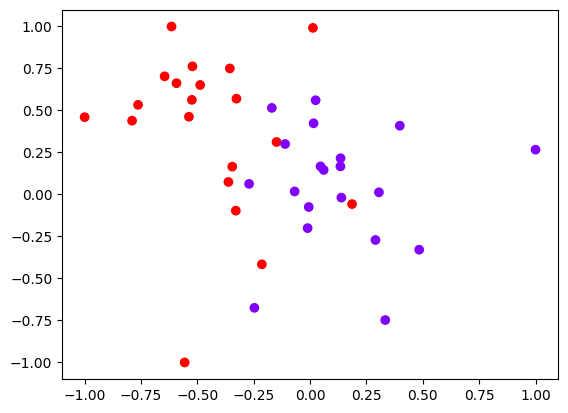

In [12]:
from sklearn.preprocessing import MinMaxScaler
X_2 = MinMaxScaler((-1,1)).fit_transform(X)
plt.scatter(X_2[:,0], X_2[:,1],c=y, cmap=plt.cm.rainbow)
plt.show()

**结果分析**: MinMaxScale将所有值缩放到min和Max之间
### 使用RobustScaler进行数据预处理
适用于箱型图分析（表达差异性分析）的处理
粗暴的将误差值超过1/4的糟糕数据去除

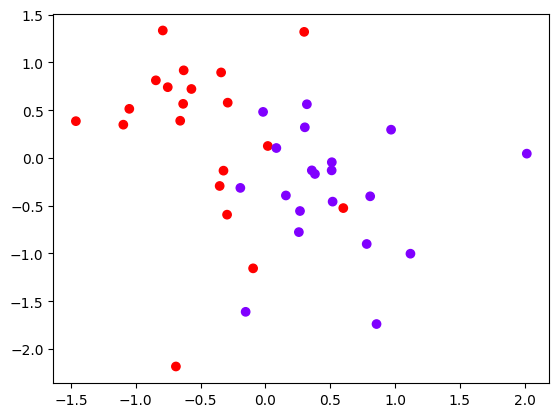

In [13]:
from sklearn.preprocessing import RobustScaler
X_3 = RobustScaler().fit_transform(X)
plt.scatter(X_3[:,0],X_3[:,1],c=y, cmap=plt.cm.rainbow)
plt.show()

**结果分析**: 使用中位数和四分位数，“粗暴缩放”，直接把一些异常值踢出去
### 使用Normalizer进行数据预处理

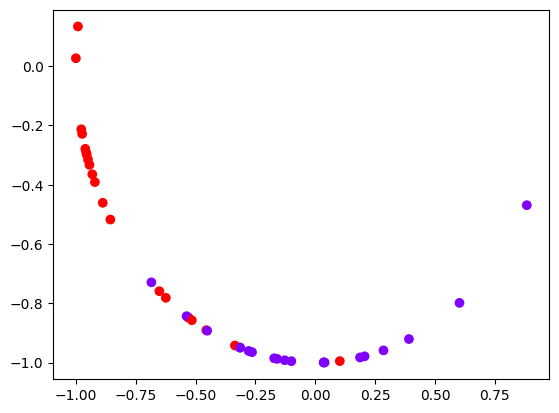

In [14]:
from sklearn.preprocessing import Normalizer
X_4 = Normalizer().fit_transform(X)
plt.scatter(X_4[:,0], X_4[:,1], c=y, cmap=plt.cm.rainbow)
plt.show()

**结果分析**: 将所有样本的特征向量转化为欧几里得距离为1，把数据分布变成一个半径为1的圆。
### 通过数据预处理提高模型准确率

In [15]:
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   random_state=8)
print(X_train.shape, X_test.shape)

(133, 13) (45, 13)


In [16]:
mlp = MLPClassifier(hidden_layer_sizes=[100,100],max_iter=1000,
                    random_state=5)
mlp.fit(X_train, y_train)
print('未经处理的模型得分：{:.2f}'.format(mlp.score(X_test, y_test)))

未经处理的模型得分：0.58


In [17]:
scaler = MinMaxScaler((-1,1))
scaler.fit(X_train)
X_train_pp = scaler.transform(X_train)
X_test_pp = scaler.transform(X_test)
mlp.fit(X_train_pp, y_train)
print('数据预处理后的模型得分:{:.2f}'.format(mlp.score(X_test_pp,y_test)))

数据预处理后的模型得分:0.98


**注意**: 数据预处理时，先拟合原始的**训练**数据集，再用它去转换原始的训练数据集和测试数据集。切记不能先拟合原始的**测试**数据集，再转换测试数据集，这样做就失去了数据转换的意义。

## 数据降维
所有数据特征都同样重要么？
### PCA主成分分析原理
买车考虑两个特征:

<img src="1-1.png" width="540">

把数据点分布最“长”的方向标注为“成分1”，与之成90度角的是“成分2”:

<img src="1-2.png" width="540">

让成分2的取值都为0，把成分1作为横坐标:

<img src="1-3.png" width="540">

### 对数据降维以便于进行可视化

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = wine.data
y = wine.target
X_scaled = scaler.fit_transform(X)
print (X_scaled.shape)

(178, 13)


In [19]:
from sklearn.decomposition import PCA
#设置主成分数量为2以便我们进行可视化
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X_pca.shape)

(178, 2)


**注意**: PCA主成分分析属于无监督学习算法，所以没有分类标签y

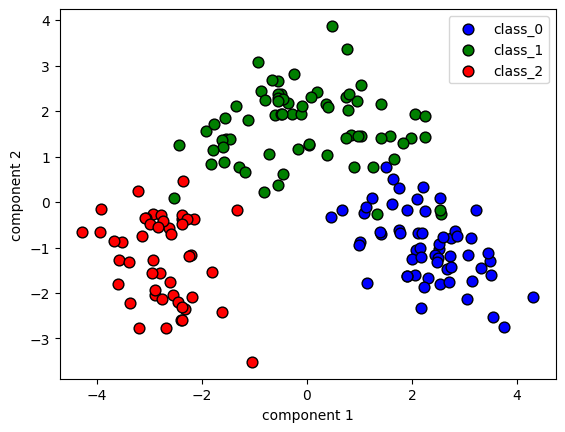

In [20]:
X0 = X_pca[wine.target==0]
X1 = X_pca[wine.target==1]
X2 = X_pca[wine.target==2]
plt.scatter(X0[:,0],X0[:,1],c='b',s=60,edgecolor='k')
plt.scatter(X1[:,0],X1[:,1],c='g',s=60,edgecolor='k')
plt.scatter(X2[:,0],X2[:,1],c='r',s=60,edgecolor='k')

plt.legend(wine.target_names, loc='best')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

**结果分析**: 之前我们只取了2个数据特征，而现在我们可以使用全部特征了，在可视化的同时不丢失太多的信息。
### 原始特征与PCA主成分之间的关系
从数学的角度，要理解内积和投影。我们从画图的角度来处理:

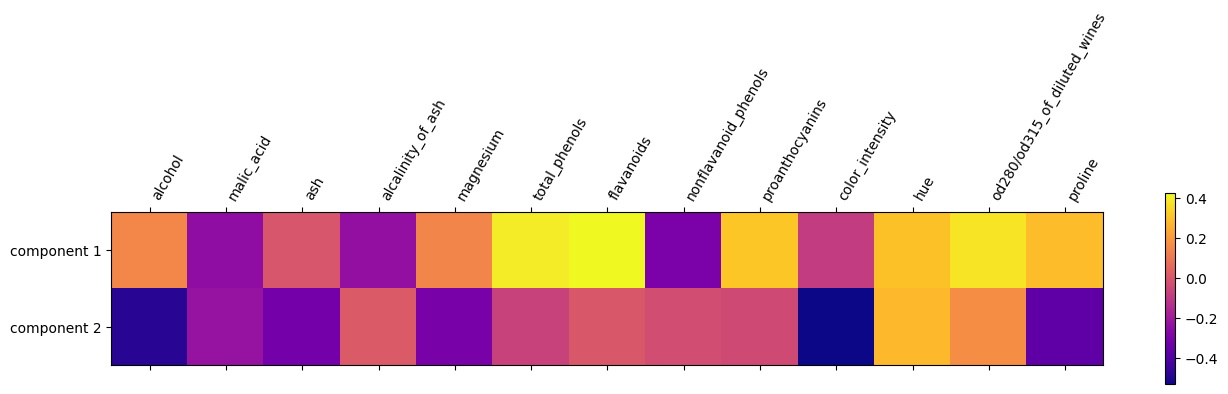

In [21]:
plt.matshow(pca.components_, cmap='plasma')
plt.yticks([0,1],['component 1','component 2'])
plt.colorbar()
plt.xticks(range(len(wine.feature_names)),wine.feature_names,
          rotation=60,ha='left')
plt.show()

**注意**: PCA的n_components不仅可以是数量，也可以是保留信息的百分比，例如n_components=0.9
## 特征提取
通过对数据集原有特征的转换，生成新的特征，称为“数据表达”(data representation)。在数据集极为复杂的情况下，我们需要新的数据处理方法，称为“特征提取”(feature extraction)
### PCA主成分分析用于特征提取

In [22]:
from sklearn.datasets._base import get_data_home 
print(get_data_home())
# 将lfw_home放在该文件夹中，无需在线下载

C:\Users\Lenovo\scikit_learn_data


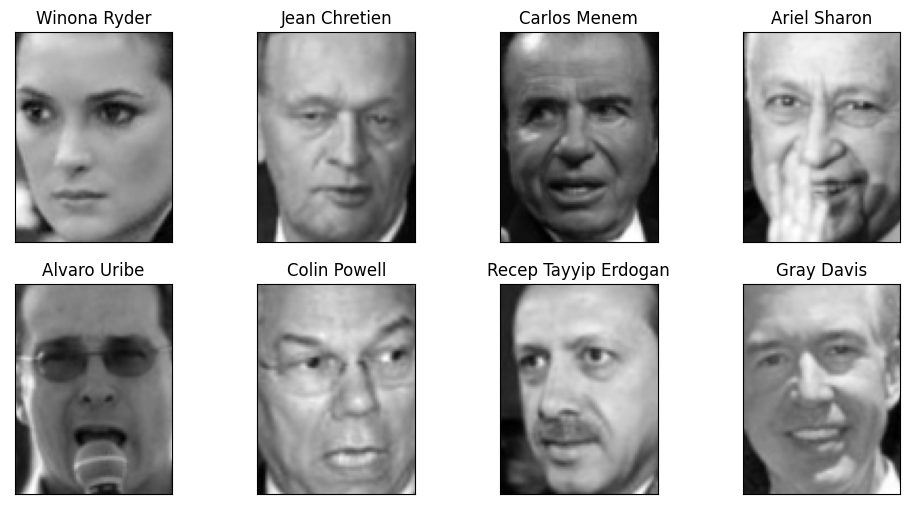

In [23]:
from sklearn.datasets import fetch_lfw_people
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
faces = fetch_lfw_people(min_faces_per_person=20, resize=0.8)
image_shape = faces.images[0].shape
fig, axes = plt.subplots(2,4,figsize=(12,6),
                        subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(faces.target,faces.images,axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(faces.target_names[target])
plt.show()

In [24]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(faces.data/255, 
                                                    faces.target,
                                                   random_state=8)
mlp=MLPClassifier(hidden_layer_sizes=[100,100], random_state=8,
                  max_iter=400)
mlp.fit(X_train, y_train)
print('模型识别准确率:{:.2f}'.format(mlp.score(X_test, y_test)))

模型识别准确率:0.55


In [25]:
# 使用白化功能处理人脸数据
pca = PCA(whiten=True, n_components=0.9, random_state=8).fit(X_train)
X_train_whiten = pca.transform(X_train)
X_test_whiten = pca.transform(X_test)
print('原始的数据形态：{}'.format(X_train.shape))
print('白化后数据形态：{}'.format(X_train_whiten.shape))

原始的数据形态：(2267, 7500)
白化后数据形态：(2267, 105)


In [26]:
# 使用白化后的数据训练神经网络
mlp.hidden_layer_sizes=[1000,100]
mlp.max_iter=1000
mlp.fit(X_train_whiten, y_train)
print('数据白化后模型识别准确率:{:.2f}'.format(mlp.score(X_test_whiten, y_test)))

数据白化后模型识别准确率:0.62


### 非负矩阵分解用于特征提取
除了PCA之外，sklearn中还封装了非负矩阵分解(Non-Negative Matrix Factorization, NMF)。NMF也是一个无监督学习算法，从坐标原点中引出了一个或者几个向量，用这些向量把原始特征信息表达出来。

<img src="1-4.png" width="480">

如果我们降低NMF的成分数量，它会重新生成新的成分，而新的成分和原来的成分完全不一样。NMF中的成分没有顺序，与PCA不同。NMF中的n_components只能使用正整数，不支持浮点数。

In [27]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=105,random_state=8).fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
print('NMF处理后数据形态：{}'.format(X_train_nmf.shape))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
C:\Users\Lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\decomposition\_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


NMF处理后数据形态：(2267, 105)


In [28]:
mlp.hidden_layer_sizes=[1000,100]
mlp.max_iter=1000
mlp.fit(X_train_nmf, y_train)
print('nmf处理后模型准确率：{:.2f}'.format(mlp.score(X_test_nmf,y_test)))

nmf处理后模型准确率：0.61


## 聚类算法
### K均值聚类算法

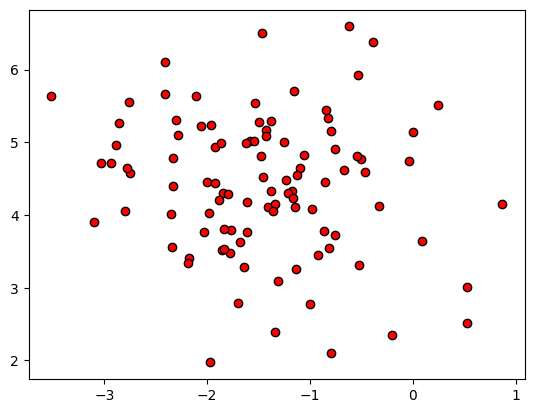

In [29]:
from sklearn.datasets import make_blobs
blobs = make_blobs(random_state=1,centers=1)
X_blobs = blobs[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1],c='r',edgecolor='k')
plt.show()

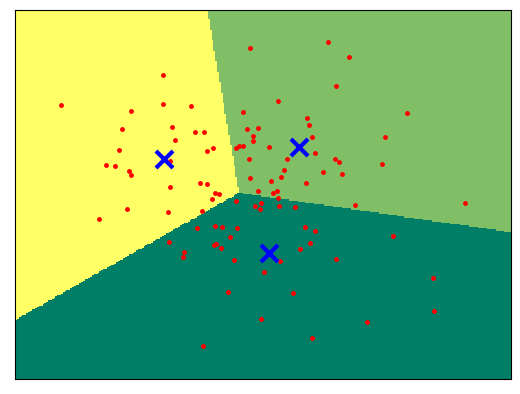

In [30]:
from sklearn.cluster import KMeans
# 要求KMeans将数据聚为3类
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_blobs)

#下面是用来画图的代码
x_min, x_max = X_blobs[:, 0].min()-0.5 , X_blobs[:, 0].max()+0.5 
y_min, y_max = X_blobs[:, 1].min()-0.5 , X_blobs[:, 1].max()+0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), 
                     np.arange(y_min, y_max, .02))


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.summer,
           aspect='auto', origin='lower')

plt.plot(X_blobs[:, 0], X_blobs[:, 1], 'r.', markersize=5)
#用蓝色叉号代表聚类的中心
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=150, linewidths=3,
            color='b', zorder=10)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**结果分析**: n_clusters参数标记为蓝色X，代表K均值对数据进行聚类的3个中心。

In [31]:
print("K均值的聚类标签:\n{}".format(kmeans.labels_))

K均值的聚类标签:
[0 0 2 1 1 1 0 0 2 1 0 1 0 2 0 1 1 0 2 2 1 2 0 0 0 0 1 0 0 0 2 2 0 0 1 2 1
 2 0 2 1 0 2 2 1 1 1 0 2 0 2 0 1 2 1 1 2 1 1 0 1 2 1 0 2 1 2 2 0 1 1 0 1 1
 1 0 1 0 0 2 1 2 1 1 2 0 1 0 2 2 1 0 2 2 1 1 0 1 1 0]


**结果分析**: K均值算法认为每个数据点到聚类中心的方向都是同等重要的，对于形状复杂的数据集来说，K均值算法不能很好的工作。
### 凝聚聚类算法
荷叶上的小水珠向荷叶中心聚集，小水珠变成大水珠，直到达到给定的大水珠的数量。

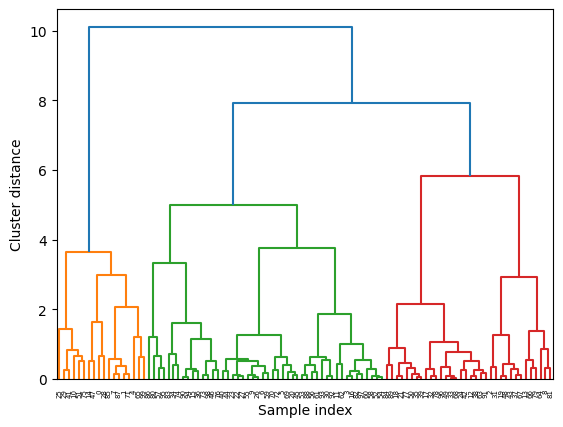

In [32]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage = ward(X_blobs)
dendrogram(linkage)
ax = plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

**结果分析**: 自下而上不断合并相似的聚类中心，类别越来越少。这种逐级生成的聚类方法称为Hierarchy clustering。凝聚聚类也无法对“形状”复杂的数据进行正确的聚类。
### DBSCAN算法
通过对特征空间内的密度进行检测，密度大的地方认为是一个类，密度小的地方认为是分界线，因此不需要一开始就指定n_clusters。

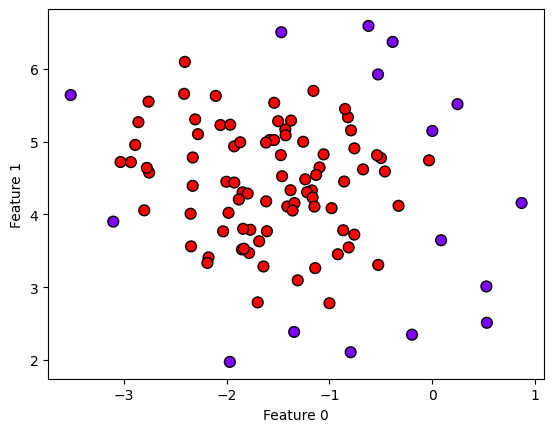

In [33]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
clusters = db.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters, cmap=plt.cm.rainbow,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [34]:
print('聚类标签为：\n{}'.format(clusters))

聚类标签为：
[-1  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0 -1]


**结果分析**: -1代表噪声  
重要的参数:  
- eps: 每坨样本的距离有多远，默认0.5，越大覆盖的点越多。
- min_sample: 某个数据点周围，被视为聚类核心点的个数，默认2，越大核心数据点越少，噪声越多。

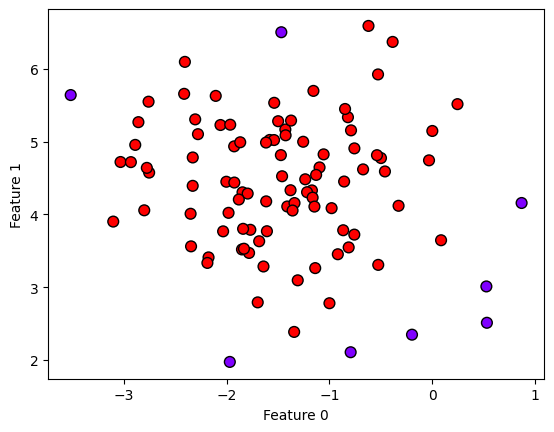

In [35]:
db_1 = DBSCAN(eps = 0.7)
clusters_1 = db_1.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_1, cmap=plt.cm.rainbow,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [36]:
print('聚类标签为：\n{}'.format(clusters_1))

聚类标签为：
[-1  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0]


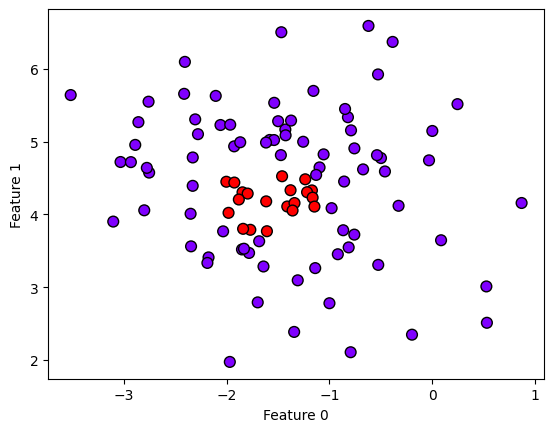

In [37]:
db_2 = DBSCAN(min_samples=20)
clusters_2 = db_2.fit_predict(X_blobs)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=clusters_2, cmap=plt.cm.rainbow,
            s=60,edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [38]:
print('聚类标签为：\n{}'.format(clusters_2))

聚类标签为：
[-1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0  0  0
 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0  0  0 -1  0 -1  0 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1]
